# Chicago Crime Data Analysis

#### Data Ingestion

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [7]:
data_path = r"archive.zip" # I am using relative path
df = pd.read_csv(data_path, low_memory=True,compression='zip') # This is how to load zipped csv file

In [8]:
print("============= View Data Head and Tail ===============")

print("============= Data Head ===============")

df.head()



============= View Data Head and Tail ===============
============= Data Head ===============


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [9]:

print("============= Data Tail ===============")

df.tail()

============= Data Tail ===============


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7784659,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,44.0,6.0,26,1172497.0,1919410.0,2022,01/03/2023 03:46:28 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)"
7784660,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,...,9.0,49.0,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
7784661,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,...,5.0,43.0,06,1193181.0,1859005.0,2022,01/03/2023 03:46:28 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)"
7784662,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,...,45.0,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"
7784663,12840464,JF411839,09/26/2022 07:20:00 PM,0000X N MASON AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,False,...,29.0,25.0,15,1136773.0,1899652.0,2022,01/03/2023 03:46:28 PM,41.880802,-87.773246,"(41.880802263, -87.773245737)"


#### Preliminary Data Analysis

Shape of the data

In [10]:
df.shape


(7784664, 22)

In [11]:
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Memory Usage: 5302.92 MB


Total Crime Case

In [12]:
total_data = df.shape[0]
print(f"there are {total_data} cases in total")

there are 7784664 cases in total


In [13]:
df.describe(include="all")


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
count,7.784664e+06,7784660,7784664,7784664,7784664,7784664,7784664,7774283,7784664,7784664,...,7.169816e+06,7.171188e+06,7784664,7.697816e+06,7.697816e+06,7.784664e+06,7784664,7.697816e+06,7.697816e+06,7697816
unique,NaN,7784121,3207478,62845,404,36,544,215,2,2,...,NaN,NaN,26,NaN,NaN,NaN,5561,NaN,NaN,890516
top,NaN,HZ140230,01/01/2008 12:01:00 AM,100XX W OHARE ST,0820,THEFT,SIMPLE,STREET,False,False,...,NaN,NaN,06,NaN,NaN,NaN,02/10/2018 03:50:01 PM,NaN,NaN,"(41.976290414, -87.905227221)"
freq,NaN,6,304,16486,631091,1642148,913484,2026828,5749900,6708370,...,NaN,NaN,1642148,NaN,NaN,NaN,2787942,NaN,NaN,14272
mean,7.026439e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.275420e+01,3.748472e+01,NaN,1.164601e+06,1.885783e+06,2.009944e+03,NaN,4.184218e+01,-8.767149e+01,NaN
std,3.502657e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.385106e+01,2.154115e+01,NaN,1.684658e+04,3.227531e+04,6.260628e+00,NaN,8.879598e-02,6.108257e-02,NaN
min,6.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,2.001000e+03,NaN,3.661945e+01,-9.168657e+01,NaN
25%,3.792574e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000e+01,2.300000e+01,NaN,1.152976e+06,1.859073e+06,2.005000e+03,NaN,4.176871e+01,-8.771367e+01,NaN
50%,7.029327e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.300000e+01,3.200000e+01,NaN,1.166110e+06,1.890730e+06,2.009000e+03,NaN,4.185591e+01,-8.766584e+01,NaN
75%,1.013113e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.400000e+01,5.700000e+01,NaN,1.176372e+06,1.909273e+06,2.015000e+03,NaN,4.190677e+01,-8.762819e+01,NaN


Check data frame info and types

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

Total data columns' list

In [15]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [16]:
data_group = df.shape[1]
print(f"There is {data_group} data columns in total")

There is 22 data columns in total


Analysis for missing data

In [17]:
df.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10381
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Community Area          613476
FBI Code                     0
X Coordinate             86848
Y Coordinate             86848
Year                         0
Updated On                   0
Latitude                 86848
Longitude                86848
Location                 86848
dtype: int64

In [18]:
missing_data = pd.DataFrame({
    'column': df.columns,
    'Missing_count': df.isna().sum(),
    'Missing_Percentage': (df.isna().sum() / len(df) * 100),
    'Data_Types': df.dtypes
})

missing_data

,column,Missing_count,Missing_Percentage,Data_Types
ID,ID,0,0.000000,int64
Case Number,Case Number,4,0.000051,object
Date,Date,0,0.000000,object
Block,Block,0,0.000000,object
IUCR,IUCR,0,0.000000,object
Primary Type,Primary Type,0,0.000000,object
Description,Description,0,0.000000,object
Location Description,Location Description,10381,0.133352,object
Arrest,Arrest,0,0.000000,bool
Domestic,Domestic,0,0.000000,bool


#### Single out columns with missing data (Descending Order)

In [19]:
missing_data = missing_data[missing_data["Missing_count"] > 0].sort_values('Missing_Percentage', ascending=False)
missing_data

,column,Missing_count,Missing_Percentage,Data_Types
Ward,Ward,614848,7.898196,float64
Community Area,Community Area,613476,7.880571,float64
Longitude,Longitude,86848,1.115629,float64
Latitude,Latitude,86848,1.115629,float64
X Coordinate,X Coordinate,86848,1.115629,float64
Y Coordinate,Y Coordinate,86848,1.115629,float64
Location,Location,86848,1.115629,object
Location Description,Location Description,10381,0.133352,object
District,District,47,0.000604,float64
Case Number,Case Number,4,0.000051,object


Check for duplicates

In [ ]:
# df.duplicated().sum()


np.int64(0)

#### The Data Set Seems to have massive missing data, common for a typical crime data.

- By Visualizing

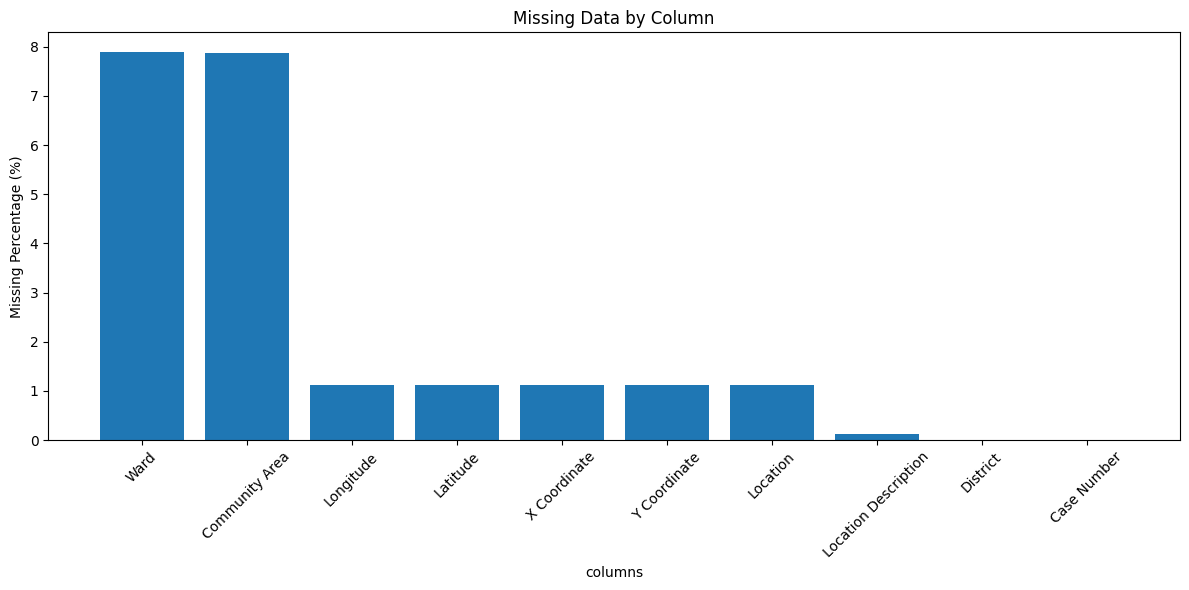

In [21]:
plt.figure(figsize=(12, 6))
if not missing_data.empty:
    plt.bar(missing_data['column'], missing_data['Missing_Percentage'])
    plt.title('Missing Data by Column')
    plt.xlabel('columns')
    plt.ylabel('Missing Percentage (%)')
   
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No missing data found!")

#### handling missing the data parts

In [32]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna("Not in record")
df.head(50)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Updated On
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,08B,2015,02/10/2018 03:50:01 PM
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,06,2015,02/10/2018 03:50:01 PM
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,06,2018,04/06/2019 04:04:43 PM
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,18,2015,02/10/2018 03:50:01 PM
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,08A,2015,02/10/2018 03:50:01 PM
5,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,05,2015,02/10/2018 03:50:01 PM
6,10224743,HY411629,09/04/2015 06:00:00 PM,021XX W CHURCHILL ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,1434,14.0,05,2015,02/10/2018 03:50:01 PM
7,10224744,HY411605,09/05/2015 01:00:00 PM,025XX W CERMAK RD,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,1034,10.0,06,2015,09/17/2015 11:37:18 AM
8,10224745,HY411654,09/05/2015 11:30:00 AM,031XX W WASHINGTON BLVD,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,True,1222,12.0,03,2015,02/10/2018 03:50:01 PM
9,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,Not in record,False,False,824,8.0,11,2016,04/06/2019 04:04:43 PM


#### Crime Distribution Analysis

In [23]:
crime_distribution = df["Primary Type"]
crime_distribution

0                     BATTERY
1                       THEFT
2                       THEFT
3                   NARCOTICS
4                     ASSAULT
                  ...        
7784659         OTHER OFFENSE
7784660    DECEPTIVE PRACTICE
7784661                 THEFT
7784662             NARCOTICS
7784663     WEAPONS VIOLATION
Name: Primary Type, Length: 7784664, dtype: object

In [24]:
print("=== CRIME TYPE DISTRIBUTION ===")
crime_counts = df['Primary Type'].value_counts()
print(crime_counts)

=== CRIME TYPE DISTRIBUTION ===
Primary Type
THEFT                                1642148
BATTERY                              1422913
CRIMINAL DAMAGE                       887266
NARCOTICS                             747633
ASSAULT                               507296
OTHER OFFENSE                         483642
BURGLARY                              424397
MOTOR VEHICLE THEFT                   375495
DECEPTIVE PRACTICE                    344940
ROBBERY                               292334
CRIMINAL TRESPASS                     214316
WEAPONS VIOLATION                     106418
PROSTITUTION                           69840
OFFENSE INVOLVING CHILDREN             55719
PUBLIC PEACE VIOLATION                 52325
SEX OFFENSE                            30683
CRIM SEXUAL ASSAULT                    27631
INTERFERENCE WITH PUBLIC OFFICER       18392
LIQUOR LAW VIOLATION                   14901
GAMBLING                               14618
ARSON                                  13249
HOMICIDE  